# Bike Sharing Assignment - Nitin Jayan#

## Reading & Understanding the Dataset##

In [54]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import *

%matplotlib inline

In [55]:
bikes_df = pd.read_csv(r"C:\Users\nitin\Downloads\day.csv")
bikes_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [56]:
bikes_df.shape

(730, 16)

In [57]:
bikes_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [58]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [59]:
bikes_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [60]:
# Converting date to datetime format
bikes_df['dteday'] = pd.to_datetime(bikes_df['dteday'])

In [61]:
bikes_df['dteday'] = bikes_df['dteday'].dt.strftime('%Y/%d/%m')

In [62]:
bikes_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018/01/01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018/01/02,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018/01/03,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018/01/04,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018/01/05,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [63]:
bikes_df["dteday"] = pd.to_datetime(bikes_df["dteday"],dayfirst=True)

bikes_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [64]:
#calculating number of days lapsed for each entry
from datetime import datetime
day0 = datetime(year = 2018, month= 1, day = 1)
bikes_df['day']= bikes_df["dteday"]- day0

In [65]:
bikes_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0 days
1,2,2018-01-02,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1 days
2,3,2018-01-03,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2 days
3,4,2018-01-04,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3 days
4,5,2018-01-05,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4 days


In [66]:
bikes_df['day'] = bikes_df['day'].astype(str)
bikes_df['day'] = bikes_df['day'].apply(lambda x:x.replace("days",""))
bikes_df['day'] = bikes_df['day'].apply(lambda x:x.replace("00:00:00.000000000",""))
bikes_df['day'] = bikes_df['day'].astype(str).astype(int)

In [67]:
#converting seasons and weathersit into categorical variables by casting them into string type

## Data Visualization - EDA ##

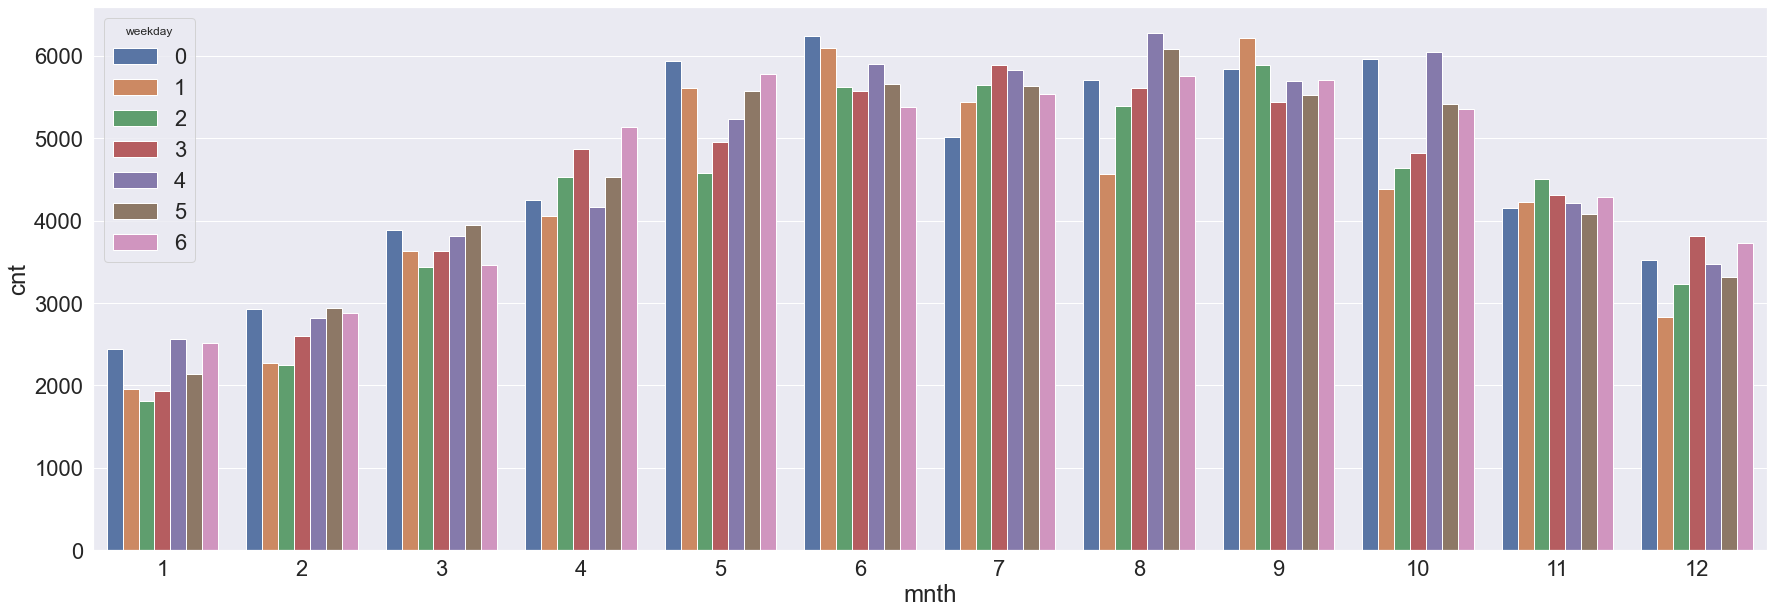

In [68]:
plt.figure(figsize = (30,10))  
sns.barplot(x = "mnth", y = "cnt", data = bikes_df,hue = "weekday", estimator=mean, ci = 0)
plt.show()

It can be observed that bicycle usage spike up during months of June,July,Aug,Sept and even October. Perhaps because of pleasant weather (in most parts of the world). 

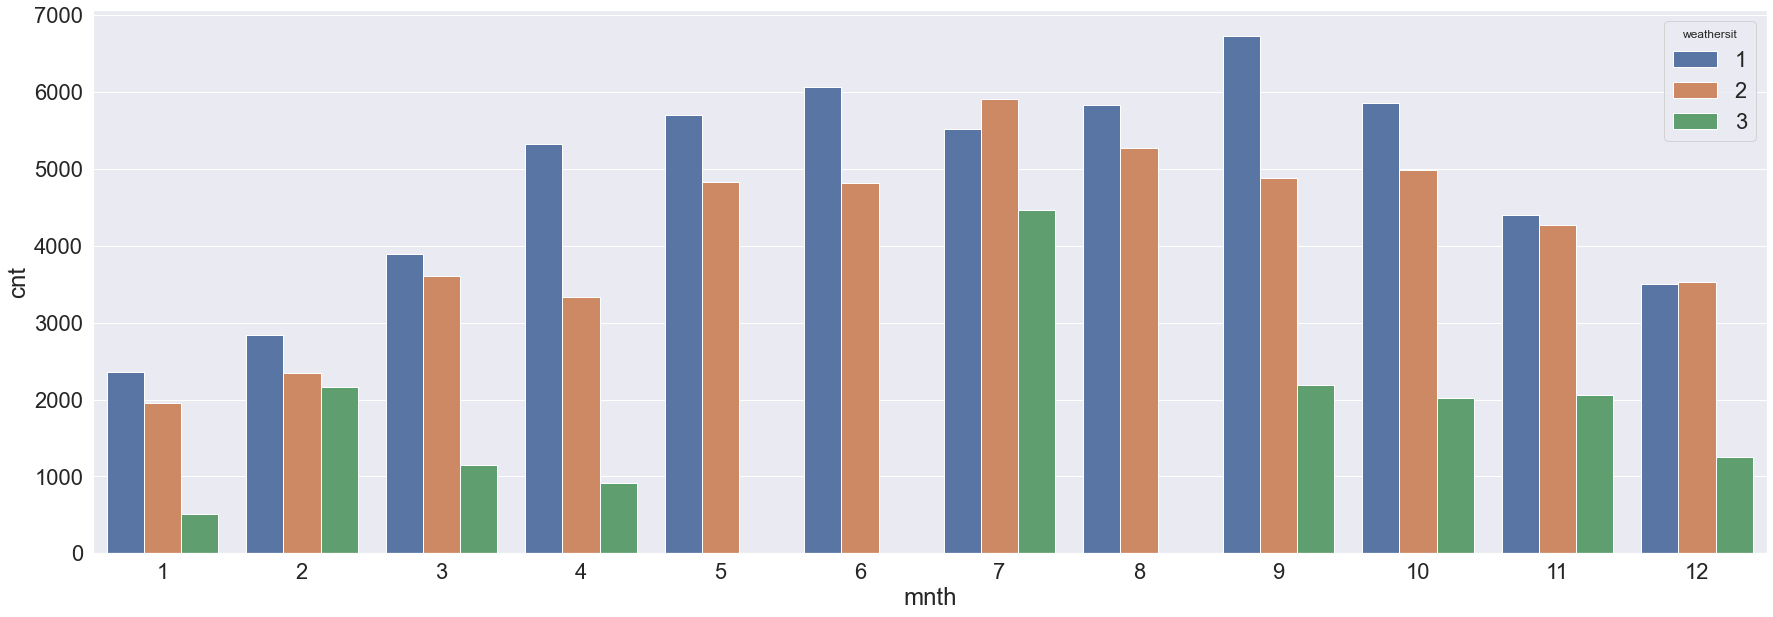

In [69]:
plt.figure(figsize = (30,10))  
sns.barplot(x = "mnth", y = "cnt", data = bikes_df,hue = "weathersit", estimator=mean, ci = 0)
plt.show()

1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

1. Weather type 1 and 2 seem to be most conducive for bike riding. According to the legend above, it is inline with conventional sense
2. Weather type 4 is not even present.

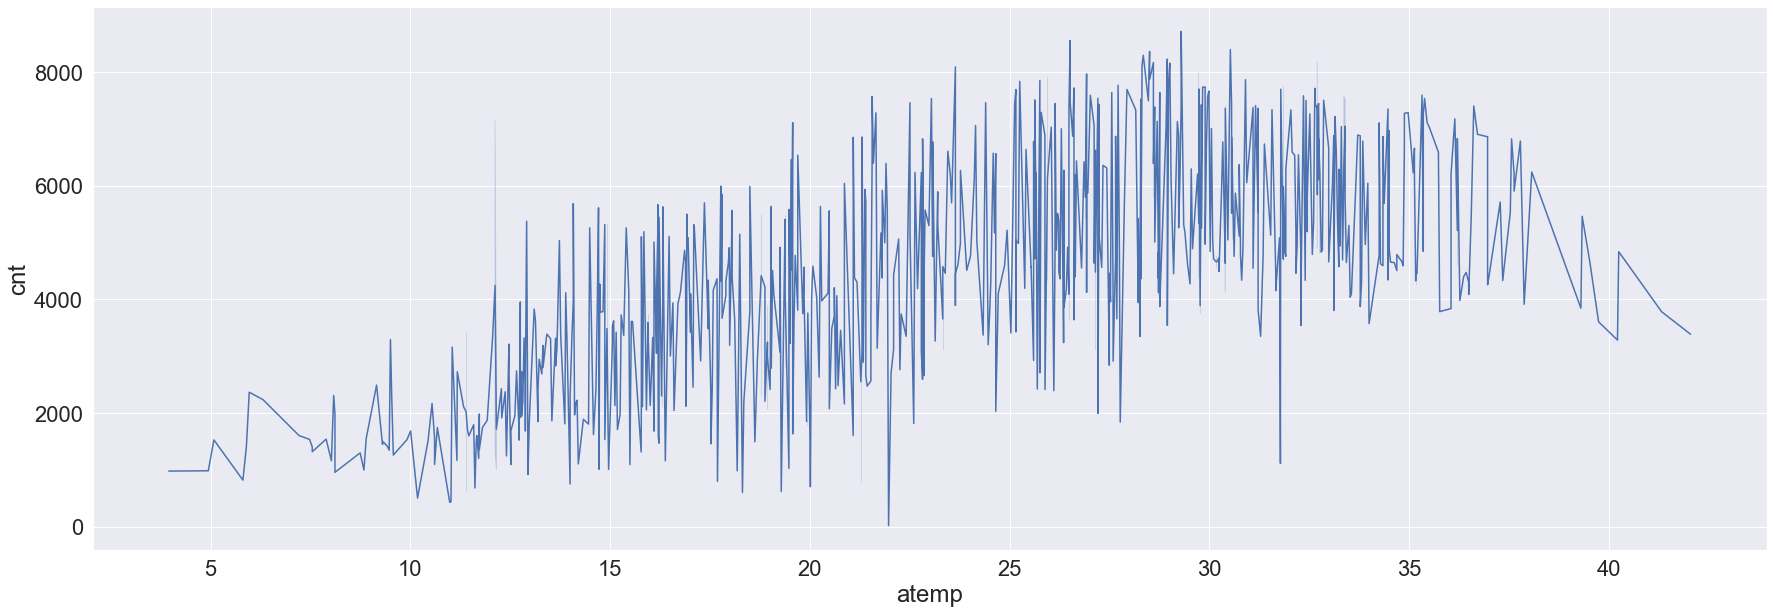

In [70]:
plt.figure(figsize = (30,10))  
sns.lineplot(x = "atemp", y = 'cnt', data = bikes_df)
plt.show()

The best temperature range for bike riding is around 15 to 35 (degree Celsius).The count keeps rising till 35 degree Celsius and drops again. Makes sense, riding a bike in freezing cold or sultry hot weather is very difficult.  

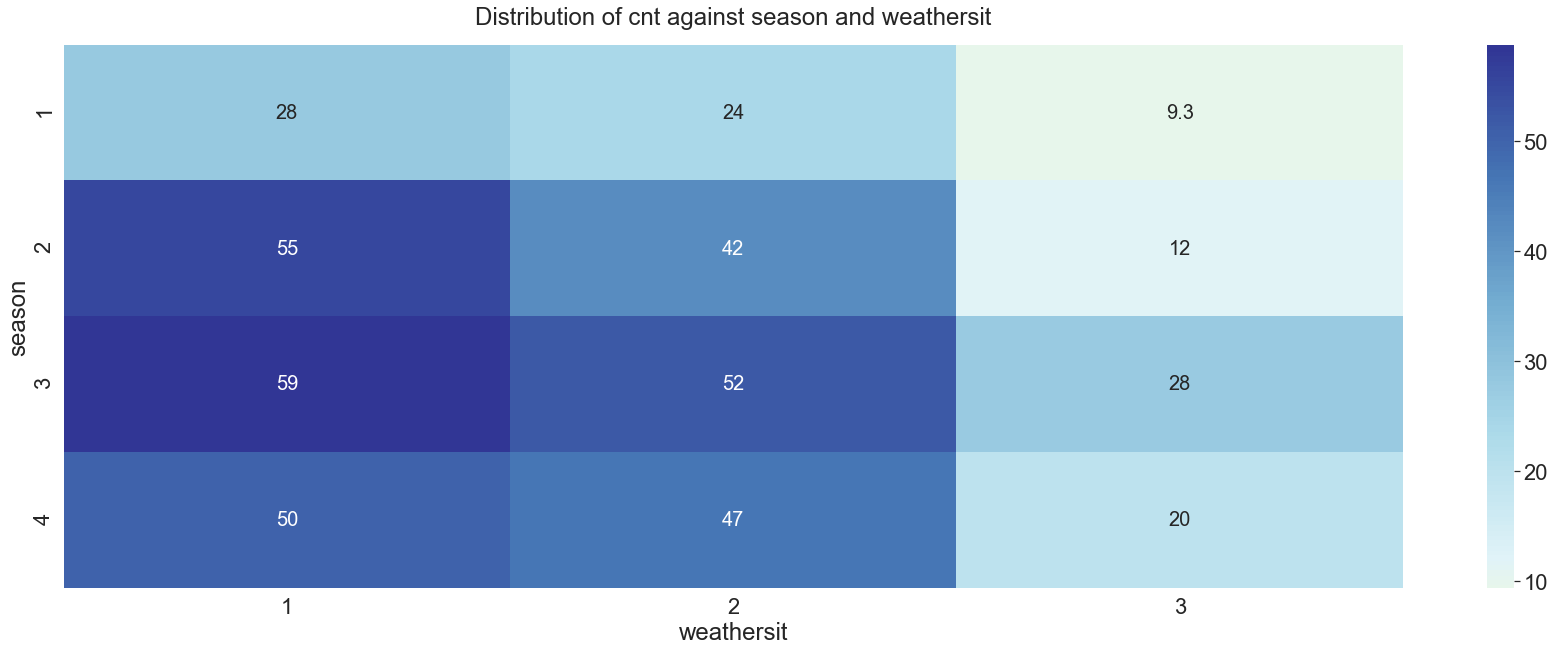

In [71]:
plt.figure(figsize = (30,10))
year_month = pd.pivot_table(data=bikes_df, index="season", columns="weathersit", values="cnt")
plt.rcParams["axes.labelsize"] = 15
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titlepad'] = 20
sns.set(font_scale = 2)
plt.title("Distribution of cnt against season and weathersit")
sns.heatmap(year_month.round(3)/100, cmap="RdYlBu", annot=True, center=0.427,annot_kws={"size":20})

plt.show()

It can be observed above season 3 accounts for the most bike usage followed by season 2 and season 4. Season 1 is least conducive to bike riding, which is strange since it is spring time.

In [72]:
bikes_df["holiday"].value_counts()

0    709
1     21
Name: holiday, dtype: int64

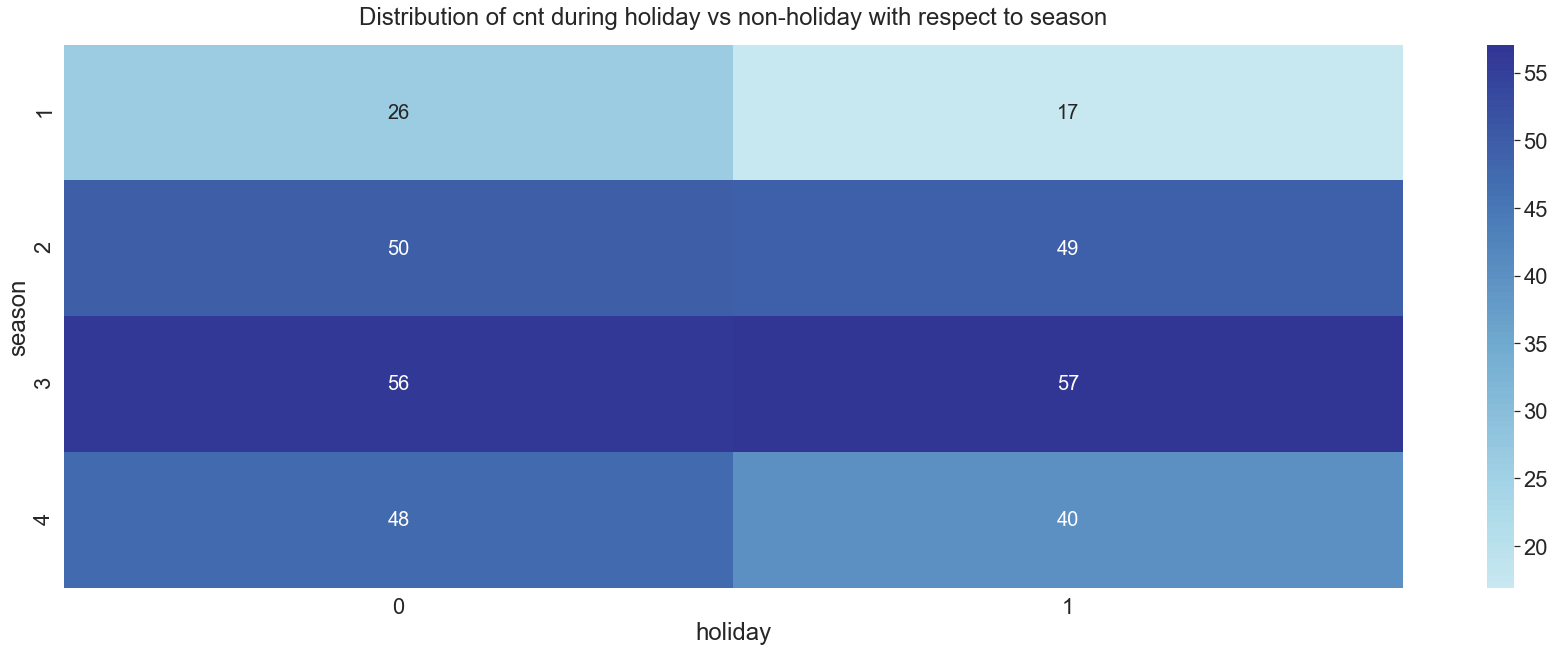

In [73]:
plt.figure(figsize = (30,10))
year_month = pd.pivot_table(data=bikes_df, index="season", columns="holiday", values="cnt")
plt.rcParams["axes.labelsize"] = 15
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titlepad'] = 20
sns.set(font_scale = 2)
plt.title("Distribution of cnt during holiday vs non-holiday with respect to season")
sns.heatmap(year_month.round(3)/100, cmap="RdYlBu", annot=True, center=0.427,annot_kws={"size":20})

plt.show()

 Not much of a stark variance in usage (although slightly higher for holiday = 0) during holiday = 0  vs holiday = 1

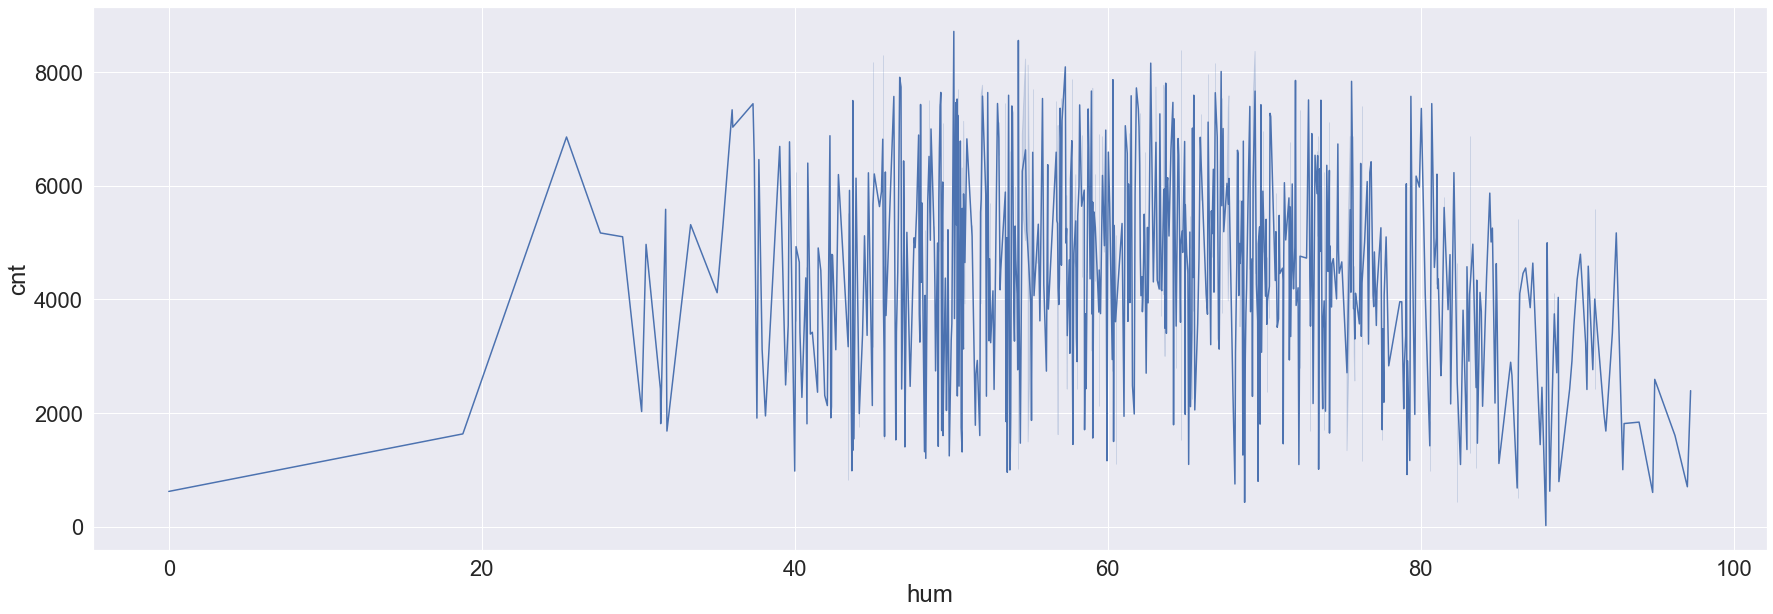

In [74]:
plt.figure(figsize = (30,10))  
sns.lineplot(x = "hum", y = 'cnt', data = bikes_df)
plt.show()

humidity range of 40-90 seems to be most conducive. Mean is more inspite of the variation.


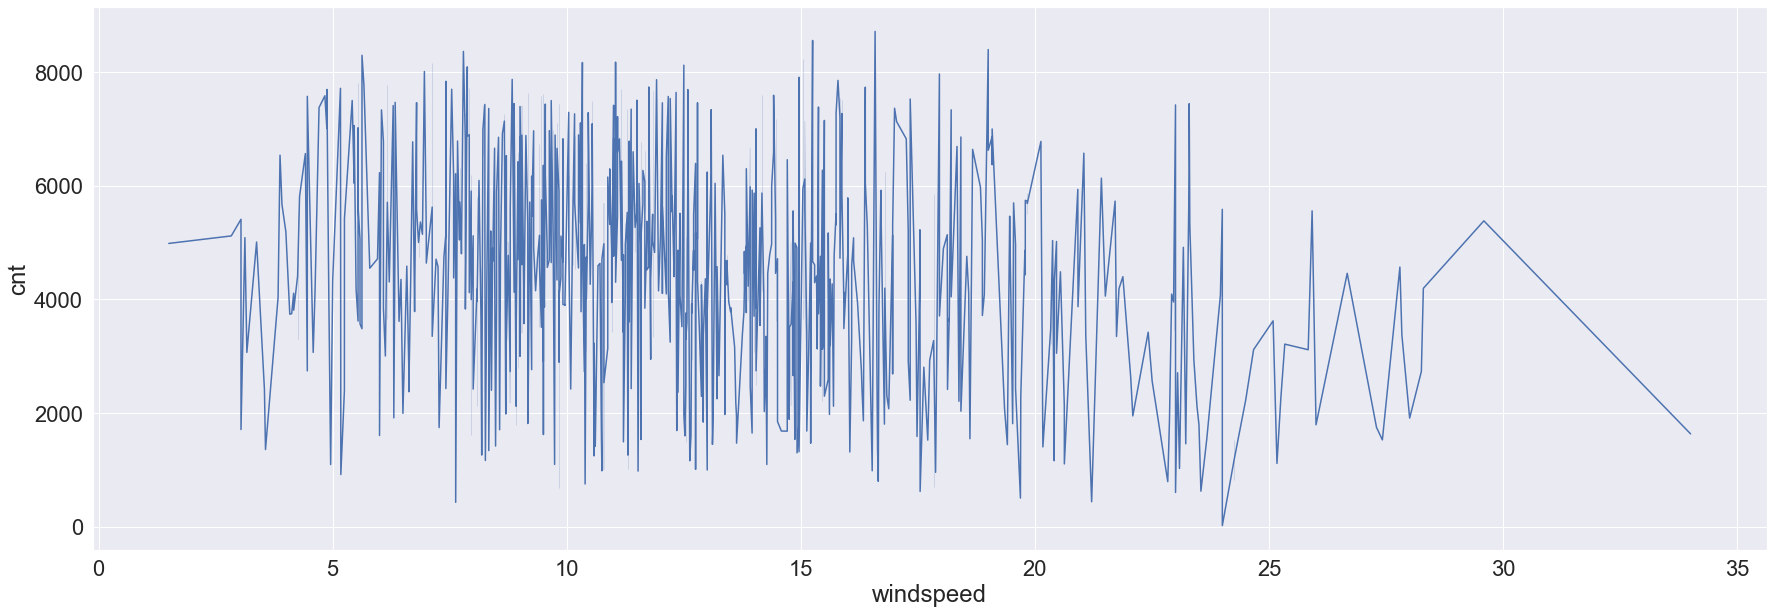

In [75]:
plt.figure(figsize = (30,10))  
sns.lineplot(x = "windspeed", y = 'cnt', data = bikes_df)
plt.show()

windspeed range of 5-18/19 seems to be the most favourable for bike riding

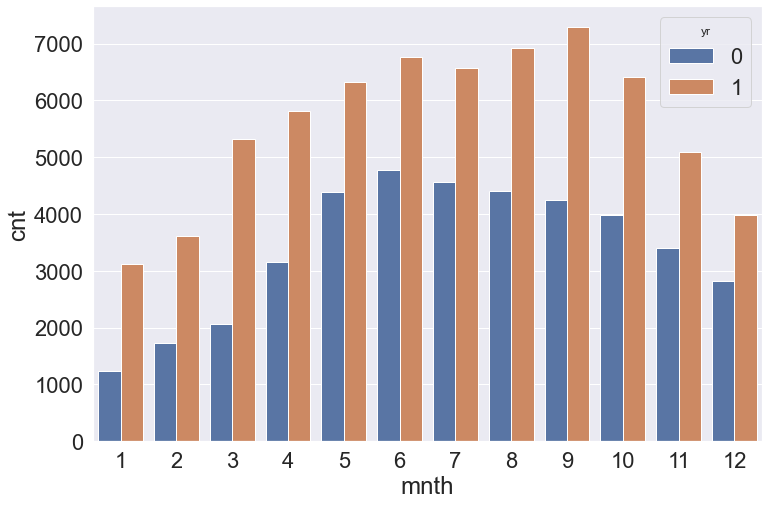

In [76]:
# Month vs cnt
plt.figure(figsize = (12,8))  
sns.barplot(x = "mnth", y = "cnt", data = bikes_df, hue = "yr", ci=0,)
plt.show()

1. 2019 (year 1) has higher bike usage than 2018 (year 0)
2. 2019 shows a slightly different trend across months compared with 2018
3. Whereas, in 2018, bike usage keeps rising till month 6 and then falls, in year 2019, the usage keeps rising till month  6, dips in month 7 and then increases through months 8 and 9

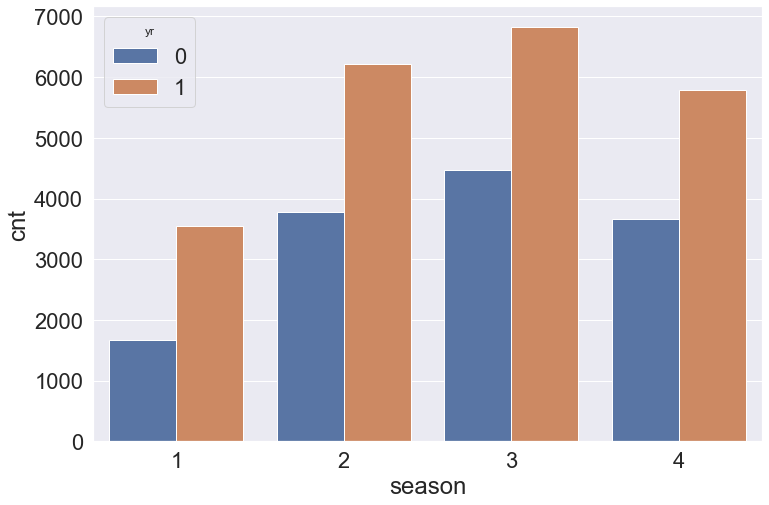

In [77]:
# Season vs cnt
plt.figure(figsize = (12,8))  
sns.barplot(x = "season", y = "cnt", data = bikes_df, hue = "yr",ci=0)
plt.show()

1. 2019 (year 1) has higher bike usage than 2018 (year 0)
2. Seasonal changes in both the years roughly mirror each other. 

### 'cnt' is the target variable according to the problem statement.

In [80]:
bikes_df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [81]:
# dropping dteday

bikes_df.drop(["dteday"],axis=1,inplace =True)

KeyError: "['dteday'] not found in axis"

In [ ]:
# Setting feature variables to X
X = bikes_df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed','day']]

# Setting target variable to y
y = bikes_df['cnt']

In [ ]:
# observing the distribution of numerical data. 
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
for i in num_cols:
    sns.distplot(bikes_df[i])
    plt.show()

In [ ]:
bikes_df.info()

### Dealing with Categorical Variables

1. Season
2. Year
3. Mnth
4. Holiday 
5. Weekday
6. workingday 
7. weathersit

In [82]:
bikes_df.drop(["instant"],axis=1,inplace =True)

In [83]:
def name_season(x):
    if x == 1:
        return "spring"
    elif x ==2 :
        return "summer"
    elif x == 3 :
        return "fall"
    else: 
        return "winter"
    
bikes_df["season"] = bikes_df["season"].apply(name_season)

In [84]:
def mnth_map(x):
    return x.map({1:'Jan', 2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun', 7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bikes_df[["mnth"]] = bikes_df[["mnth"]].apply(mnth_map)

In [85]:
def weathersit_map(x):
    return x.map({1:'Partly_cloudy', 2:'Mist',3:'Light_snow',4:'Heavy_rain'})
bikes_df[["weathersit"]]=bikes_df[["weathersit"]].apply(weathersit_map)


In [86]:
bikes_df_bkp = bikes_df.copy()

In [87]:
def weekday_map(x):
    return x.map({1:'Mon', 2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat', 0:'Sun'})
bikes_df[["weekday"]]=bikes_df[["weekday"]].apply(weekday_map)


In [88]:
bikes_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,spring,0,Jan,0,Wed,1,Partly_cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,spring,0,Jan,0,Thu,1,Partly_cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,spring,0,Jan,0,Fri,1,Partly_cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [89]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
 14  day         730 non-null    int32  
dtypes: float64(4), int32(1), int64(6), object(4)
memory usage: 82.8+ KB


In [90]:
bikes_df[["yr","holiday","workingday"]]=bikes_df[["yr","holiday","workingday"]].astype('object')

In [91]:
bikes_cat = bikes_df.select_dtypes(exclude=["int64","int32","float64"])

In [92]:
bikes_cat.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

0


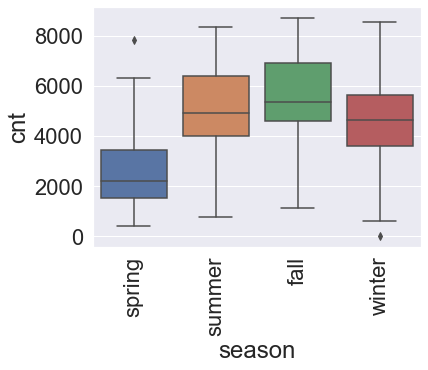

1


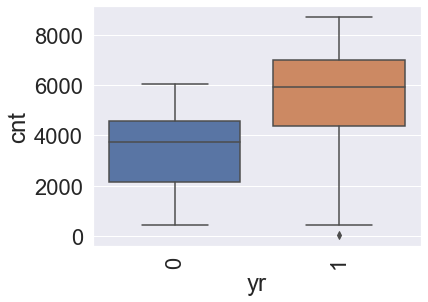

2


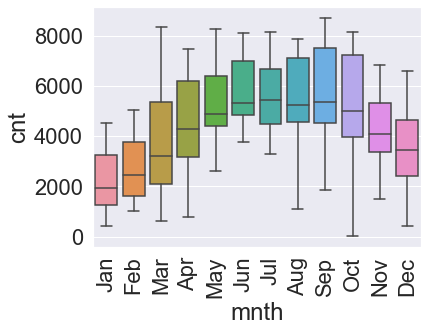

3


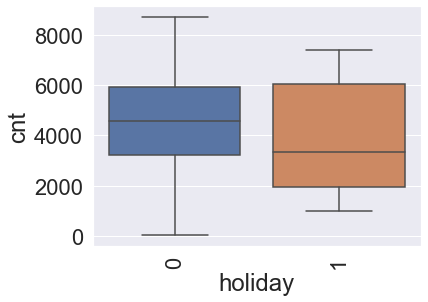

4


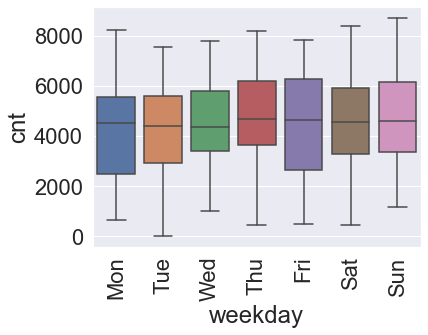

5


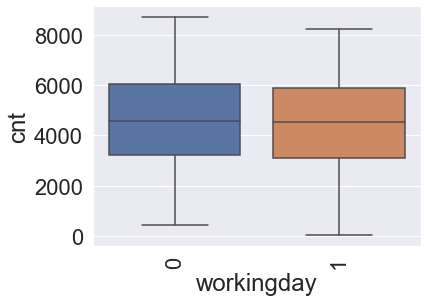

6


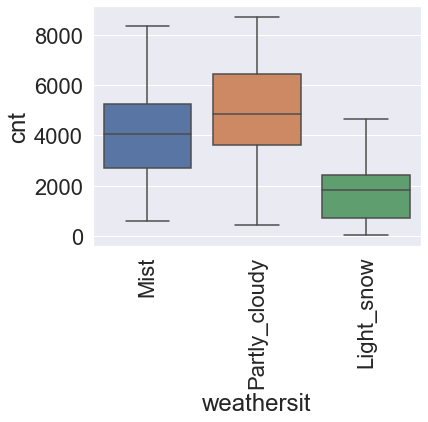

In [93]:

l= list(bikes_cat.columns)

for i in l :
    Index = l.index(i)
    print(Index)
    plt.figure(figsize=(20, 15))
    plt.subplot(3,3,Index+1)
    plot = sns.boxplot(x = i, y = 'cnt', data = bikes_df,)
    plt.setp(plot.get_xticklabels(),rotation = 90)
    plt.show()


1. As seen in the EDA section, fall season has the highest usage rate and spring has the least. 
2. Median usage rates are the highest in July, followed by June and August. Jan has the lowest.
3. Weather (1: Clear, Few clouds, Partly cloudy, Partly cloudy) has the highest usage rate of bikes. No bike usage during weather 4 ( 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog).


In [94]:
#Converting all numeric data into float:
float_list = ["temp","atemp","hum","windspeed","casual","registered","day","cnt"]
for var in float_list:
    bikes_df[var]=bikes_df[var].astype("float")

In [95]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    float64
 12  registered  730 non-null    float64
 13  cnt         730 non-null    float64
 14  day         730 non-null    float64
dtypes: float64(8), object(7)
memory usage: 85.7+ KB


In [96]:
bikes_num = bikes_df.select_dtypes(include=("float"))

In [97]:
bikes_num.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'day'],
      dtype='object')

<Figure size 1800x720 with 0 Axes>

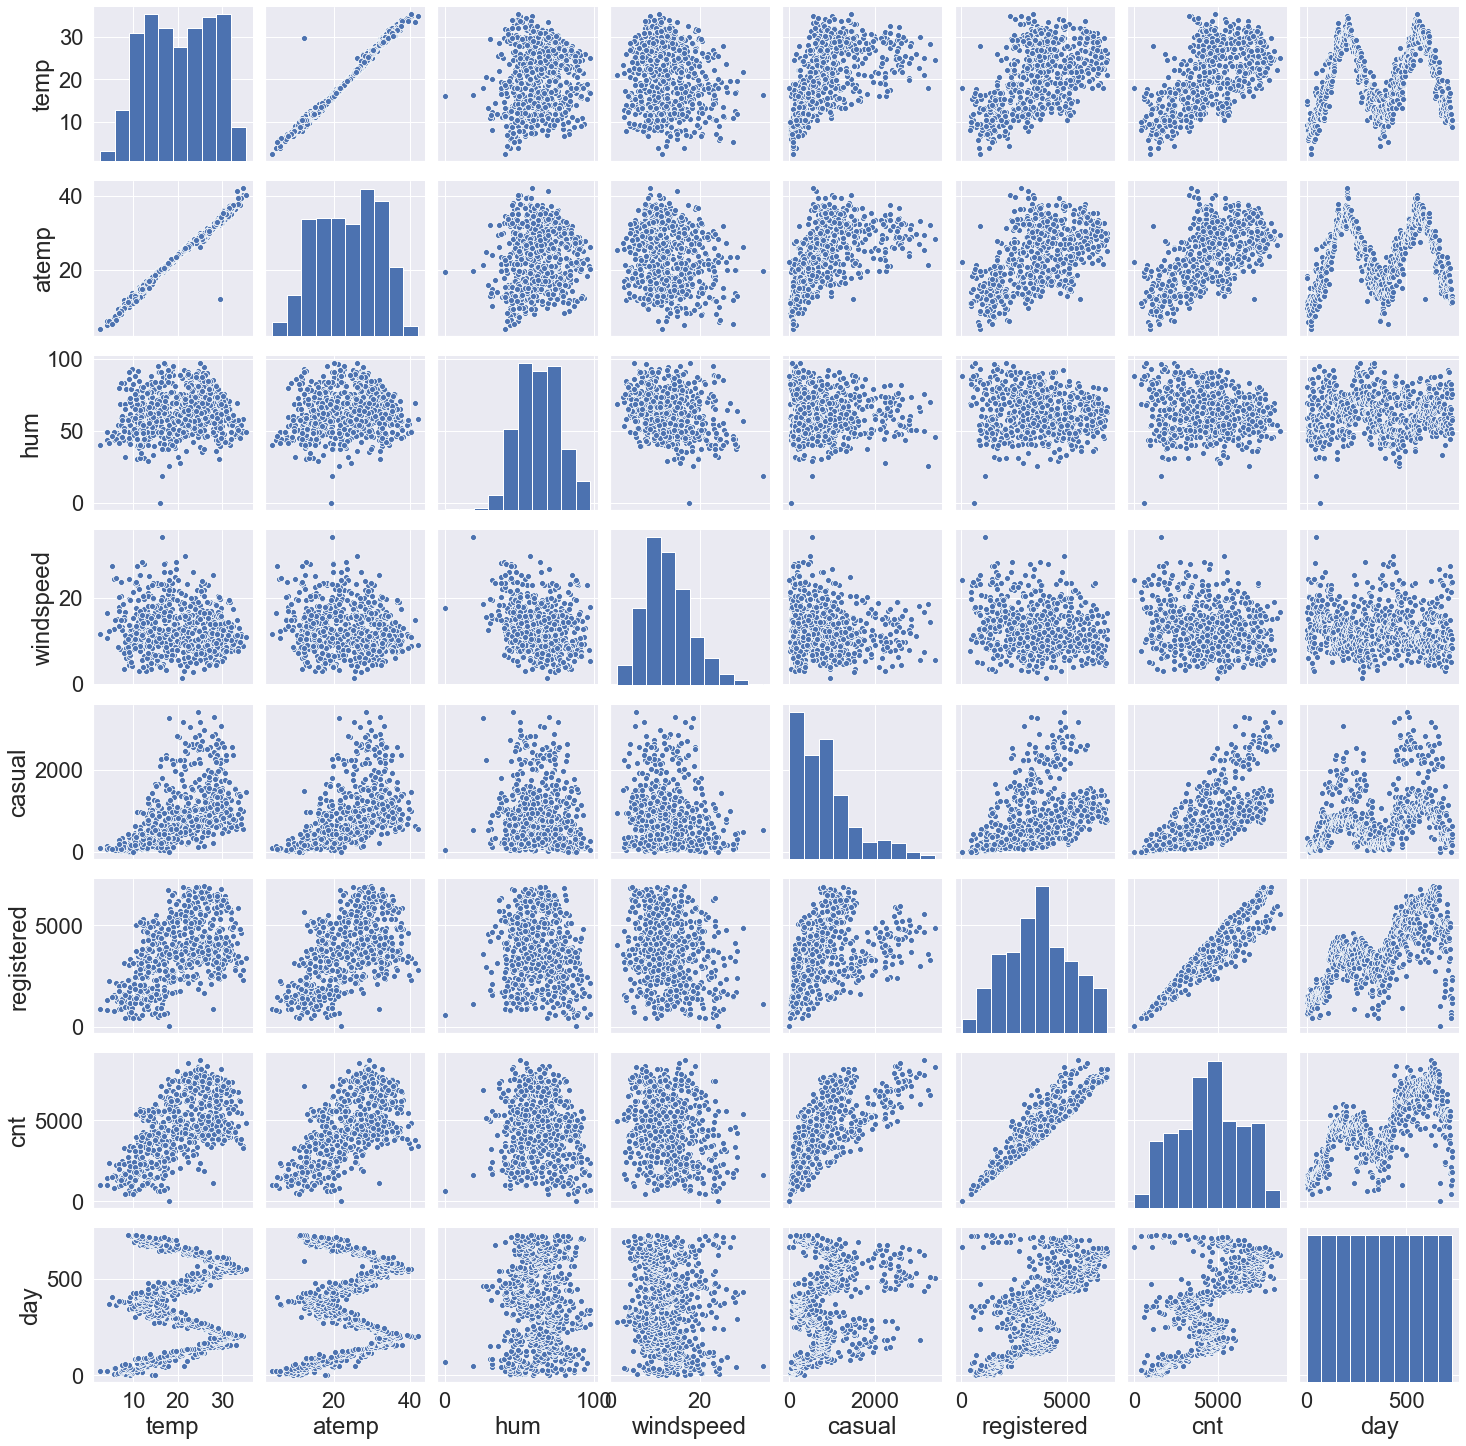

In [98]:
plt.figure(figsize = (25,10))
sns.pairplot(bikes_num)
plt.show()

1. There exists a strong linear relationship between temp & atemp
2. Cnt seems to be correlated with casual & registered (linear relationship observed in bivariate plot)

__Correlation Matrix__

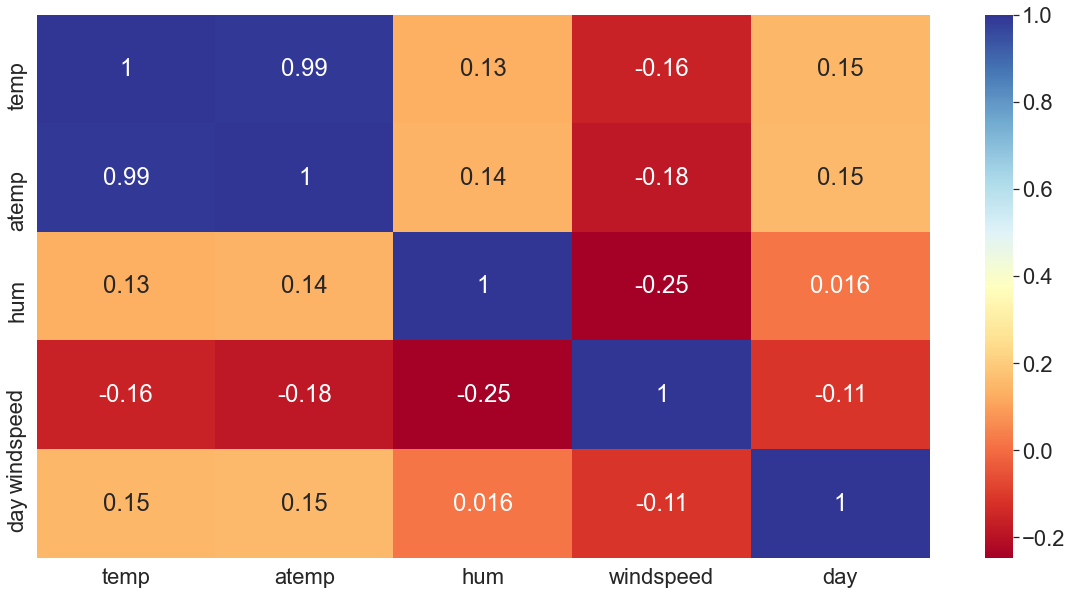

In [101]:
corr_variables = [x for x in bikes_num.columns if x not in ['cnt', 'registered', 'casual']]
cor = bikes_num[corr_variables].corr()
plt.figure(figsize = (20,10))
sns.heatmap(cor,annot=True, cmap="RdYlBu")
plt.show()

1. atemp & temp are correlated, so one should be removed

In [103]:
bikes_df_bkp = bikes_df.copy()

In [104]:
# remove variables that are not predictors
bikes_df = bikes_df.drop(["registered", "casual"], axis = 1)

# remove correlated variables
bikes_df = bikes_df.drop(["atemp"], axis = 1)

## Preparing the data ##

In [105]:
bikes_dummies=pd.get_dummies(bikes_cat,drop_first=True)
bikes_dummies.head()

,season_spring,season_summer,season_winter,yr_1,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,holiday_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_1,weathersit_Mist,weathersit_Partly_cloudy
0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,1
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,1
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [106]:
bikes_df = bikes_df.drop(bikes_cat.columns,axis=1)

In [107]:
bikes_df = pd.concat([bikes_df,bikes_dummies],axis=1)

In [108]:
bikes_df.head()

,temp,hum,windspeed,cnt,day,season_spring,season_summer,season_winter,yr_1,mnth_Aug,...,holiday_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_1,weathersit_Mist,weathersit_Partly_cloudy
0,14.110847,80.5833,10.749882,985.0,0.0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,14.902598,69.6087,16.652113,801.0,1.0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
2,8.050924,43.7273,16.636703,1349.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,8.200000,59.0435,10.739832,1562.0,3.0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,9.305237,43.6957,12.522300,1600.0,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


## Scaling

In [109]:
from sklearn.preprocessing import MinMaxScaler

In [110]:
scaler = MinMaxScaler()

## Splitting the data into train and test set

In [111]:
from sklearn.model_selection import train_test_split

In [127]:
np.random.seed(0)
df_train, df_test = train_test_split(bikes_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [128]:
print(df_train.describe(include="all"))

             temp         hum   windspeed          cnt         day  \
count  510.000000  510.000000  510.000000   510.000000  510.000000   
mean    20.102429   63.112926   12.831318  4486.382353  367.941176   
std      7.431169   14.156632    5.291832  1952.158739  209.868619   
min      2.424346    0.000000    2.834381    22.000000    0.000000   
25%     13.606865   52.270825    9.041918  3120.000000  186.250000   
50%     20.209597   63.437500   12.083182  4530.000000  372.000000   
75%     26.615847   73.250025   15.750879  5973.500000  552.750000   
max     35.328347   97.041700   34.000021  8714.000000  728.000000   

       season_spring  season_summer  season_winter        yr_1    mnth_Aug  \
count     510.000000     510.000000      510.00000  510.000000  510.000000   
mean        0.243137       0.245098        0.24902    0.507843    0.096078   
std         0.429398       0.430568        0.43287    0.500429    0.294988   
min         0.000000       0.000000        0.00000    0.0

## Linear Regression

In [117]:
from sklearn.linear_model import LinearRegression

### Model Iterations

In [118]:
lm1 = LinearRegression()

In [129]:
target = 'cnt'
predictors = [x for x in df_train.columns if x!=target]

In [189]:
X_train = df_train[predictors]
y_train = df_train[target]

In [190]:
X_train = scaler.fit_transform(X_train)

In [191]:
X_train = pd.DataFrame(X_train)
X_train.columns = predictors
X_train.index = df_train.index

# add constant
X_train['const'] = 1

In [227]:
from statsmodels.api import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor

def linear_regression(X, y, display_report=True, return_model=False):
    lm1 = OLS(y,X).fit()
    
    vif = pd.DataFrame()
    variables = lm1.model.exog

    vif['Variable'] = X.columns
    vif['VIF'] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
    vif['pval'] = lm1.pvalues.values
    
    if display_report:
        display(lm1.summary())
        display(vif.sort_values(by=['pval', 'VIF'], ascending=False))
        
    if return_model:
        return lm1, vif.sort_values(by=['pval', 'VIF'], ascending=False)
    
    return vif.sort_values(by=['pval', 'VIF'], ascending=False)

In [193]:
vif_report = linear_regression(X_train, y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     94.48
Date:                Sun, 13 Dec 2020   Prob (F-statistic):          4.17e-178
Time:                        19:57:18   Log-Likelihood:                -4101.9
No. Observations:                 510   AIC:                             8264.
Df Residuals:                     480   BIC:                             8391.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
temp                      3868.9486    407.537      9.493      0.000    3068.172    4669.725
hum                      -1361.2319    338.790     -4.018      0.000   -2026.927    -695.537
windspeed                -1588.7124    226.508     -7.014      0.000   -2033.783   -1143.642
day                       -783.5221   2862.643     -0.274      0.784   -6408.382    4841.338
season_spring             -383.9962    263.673     -1.456      0.146    -902.092     134.099
season_summer              367.8307    230.051      1.599      0.110     -84.201     819.862
season_winter              959.1981    245.645      3.905      0.000     476.525    1441.871
yr_1                      2399.7725   1438.192      1.669      0.096    -426.158    5225.703
mnth_Aug                   320.7480    571.461      0.561      0.575    -802.125    1443.621
mnth_Dec                  -130.3784   1017.574     -0.128      0.898   -2129.829    1869.072
mnth_Feb                  -384.4435    363.980     -1.056      0.291   -1099.635     330.748
mnth_Jan                  -645.1914    447.616     -1.441      0.150   -1524.721     234.338
mnth_Jul                  -203.3415    478.330     -0.425      0.671   -1143.221     736.538
mnth_Jun                    76.3091    331.627      0.230      0.818    -575.311     727.929
mnth_Mar                   -25.1657    242.408     -0.104      0.917    -501.478     451.147
mnth_May                   240.8139    217.806      1.106      0.269    -187.158     668.786
mnth_Nov                  -125.1075    919.697     -0.136      0.892   -1932.237    1682.022
mnth_Oct                   255.1584    811.704      0.314      0.753   -1339.775    1850.091
mnth_Sep                   913.6737    667.262      1.369      0.172    -397.441    2224.788
holiday_1                -1175.9790    568.579     -2.068      0.039   -2293.191     -58.767
weekday_Mon               -214.7593    126.818     -1.693      0.091    -463.946      34.427
weekday_Sat               -487.0732    622.815     -0.782      0.435   -1710.853     736.707
weekday_Sun               -432.1816    622.024     -0.695      0.488   -1654.408     790.045
weekday_Thu                 34.1217    130.136      0.262      0.793    -221.585     289.829
weekday_Tue               -228.6592    127.655     -1.791      0.074    -479.491      22.172
weekday_Wed                -96.8626    132.918     -0.729      0.467    -358.035     164.310
workingday_1              -524.1665    617.975     -0.848      0.397   -1738.437     690.104
weathersit_Mist           1669.9622    218.985      7.626      0.000    1239.674    2100.250
weathersit_Partly_cloudy  2188.2904    231.559      9.450      0.000    1733.295    2643.285
const                     1370.1856    873.012      1.569      0.117    -345.212    3085.583
==============

,Variable,VIF,pval
14,mnth_Mar,4.398797,9.173592e-01
9,mnth_Dec,67.675024,8.981024e-01
16,mnth_Nov,56.446763,8.918536e-01
13,mnth_Jun,6.420009,8.181080e-01
23,weekday_Thu,1.758376,7.932798e-01
3,day,575.393969,7.844284e-01
17,mnth_Oct,43.968863,7.533927e-01
12,mnth_Jul,13.678899,6.709489e-01
8,mnth_Aug,24.009343,5.748702e-01
22,weekday_Sun,38.786067,4.875175e-01


In [194]:
# 1.dropping mnth_Mar for high p value
X_train = X_train.drop(["mnth_Mar"], axis = 1)

In [195]:
# remove the rest of the insignificant variables (1 variable at a time) in a loop (except constant)
vif_report = linear_regression(X_train, y_train, display_report=False)
vif_report = vif_report.loc[vif_report['Variable']!='const']

current_var = vif_report.iloc[0, 0]
current_var_pval = vif_report.iloc[0, 2]

while current_var_pval>0.05:
    print("Dropping insignificant variable: "+current_var+" (pval= {0})".format(current_var_pval))
    X_train = X_train.drop([current_var], axis = 1)
    
    # recreate linear regression report
    vif_report = linear_regression(X_train, y_train, display_report=False)
    vif_report = vif_report.loc[vif_report['Variable']!='const']
    
    # update current variable and its p-value
    current_var = vif_report.iloc[0, 0]
    current_var_pval = vif_report.iloc[0, 2]

Dropping insignificant variable: mnth_Dec (pval= 0.8703007293120261)
Dropping insignificant variable: mnth_Nov (pval= 0.9605028393665836)
Dropping insignificant variable: weekday_Thu (pval= 0.7921320283885029)
Dropping insignificant variable: mnth_Jul (pval= 0.6026561628734223)
Dropping insignificant variable: weekday_Sun (pval= 0.4577863352943239)
Dropping insignificant variable: weekday_Sat (pval= 0.6277933526339401)
Dropping insignificant variable: workingday_1 (pval= 0.5826715925310177)
Dropping insignificant variable: mnth_Jun (pval= 0.2805964973556288)
Dropping insignificant variable: weekday_Wed (pval= 0.23629568647943208)
Dropping insignificant variable: season_spring (pval= 0.16662190219939146)
Dropping insignificant variable: mnth_May (pval= 0.22021526531401805)
Dropping insignificant variable: day (pval= 0.22740310536904557)
Dropping insignificant variable: mnth_Feb (pval= 0.17101113526090017)


In [196]:
# latest linear regression report
vif_report

,Variable,VIF,pval
7,mnth_Jan,1.560423,2.477287e-02
11,weekday_Mon,1.046029,1.589367e-02
12,weekday_Tue,1.053010,1.483833e-02
8,mnth_Oct,1.500100,1.479445e-02
6,mnth_Aug,1.464464,6.856214e-04
10,holiday_1,1.022338,1.566165e-04
1,hum,1.886273,7.399813e-06
2,windspeed,1.203657,8.803209e-13
9,mnth_Sep,1.247395,7.574321e-14
13,weathersit_Mist,8.942982,7.091461e-14


All p-values are within 0.05. Proceed to eliminate variables with high VIF (VIF>10)

In [197]:
# remove redundant variables (high VIF), one at a time (except constant, evaluate constant at the end)
vif_report = linear_regression(X_train, y_train, display_report=False)
vif_report = vif_report.loc[vif_report['Variable']!='const']
vif_report.sort_values(by=['VIF'], ascending=False, inplace=True)

current_var = vif_report.iloc[0, 0]
current_var_vif = vif_report.iloc[0, 1]

while current_var_vif>10:
    print("Dropping variable: "+current_var+" (VIF= {0})".format(current_var_vif))
    X_train = X_train.drop([current_var], axis = 1)
    
    # recreate linear regression report
    vif_report = linear_regression(X_train, y_train, display_report=False)
    vif_report = vif_report.loc[vif_report['Variable']!='const']
    vif_report.sort_values(by=['VIF'], ascending=False, inplace=True)
    
    # update current variable and its p-value
    current_var = vif_report.iloc[0, 0]
    current_var_vif = vif_report.iloc[0, 1]

Dropping variable: weathersit_Partly_cloudy (VIF= 10.270933430686908)


In [198]:
# view linear regression report
vif_report = linear_regression(X_train, y_train, display_report=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     160.9
Date:                Sun, 13 Dec 2020   Prob (F-statistic):          6.69e-174
Time:                        19:58:44   Log-Likelihood:                -4150.3
No. Observations:                 510   AIC:                             8331.
Df Residuals:                     495   BIC:                             8394.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
temp             4616.3537    232.852     19.825      0.000    4158.854    5073.854
hum             -2645.0646    323.497     -8.176      0.000   -3280.662   -2009.467
windspeed       -2016.6256    236.485     -8.528      0.000   -2481.263   -1551.988
season_summer     882.2846    105.253      8.383      0.000     675.487    1089.082
season_winter    1125.7843    122.667      9.178      0.000     884.772    1366.796
yr_1             2003.2170     75.623     26.489      0.000    1854.634    2151.800
mnth_Aug          503.2570    152.779      3.294      0.001     203.081     803.433
mnth_Jan         -252.3669    163.574     -1.543      0.124    -573.752      69.019
mnth_Oct          239.2719    161.678      1.480      0.140     -78.388     556.931
mnth_Sep         1051.6686    152.805      6.882      0.000     751.442    1351.896
holiday_1        -750.2629    238.509     -3.146      0.002   -1218.879    -281.647
weekday_Mon      -230.4811    105.184     -2.191      0.029    -437.144     -23.818
weekday_Tue      -168.9123    105.786     -1.597      0.111    -376.756      38.932
weathersit_Mist  -217.9389     92.791     -2.349      0.019    -400.252     -35.626
const            2883.5871    257.329     11.206      0.000    2377.995    3389.179
==============================================================================
Omnibus:                      106.593   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              297.612
Skew:                          -1.009   Prob(JB):                     2.37e-65
Kurtosis:                       6.152   Cond. No.                         17.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Variable,VIF,pval
8,mnth_Oct,1.488224,1.395280e-01
7,mnth_Jan,1.554619,1.235116e-01
12,weekday_Tue,1.047032,1.109614e-01
11,weekday_Mon,1.046011,2.890204e-02
13,weathersit_Mist,1.401601,1.923121e-02
10,holiday_1,1.020562,1.756997e-03
6,mnth_Aug,1.464043,1.058400e-03
9,mnth_Sep,1.246701,1.787414e-11
1,hum,1.605320,2.473404e-15
3,season_summer,1.480366,5.411808e-16


In [199]:
# two variables have high p-value now, remove 1 at a time
vif_report = linear_regression(X_train, y_train, display_report=False)
vif_report = vif_report.loc[vif_report['Variable']!='const']

current_var = vif_report.iloc[0, 0]
current_var_pval = vif_report.iloc[0, 2]

while current_var_pval>0.05:
    print("Dropping insignificant variable: "+current_var+" (pval= {0})".format(current_var_pval))
    X_train = X_train.drop([current_var], axis = 1)
    
    # recreate linear regression report
    vif_report = linear_regression(X_train, y_train, display_report=False)
    vif_report = vif_report.loc[vif_report['Variable']!='const']

    # update current variable and its p-value
    current_var = vif_report.iloc[0, 0]
    current_var_pval = vif_report.iloc[0, 2]

Dropping insignificant variable: mnth_Oct (pval= 0.139528003206495)
Dropping insignificant variable: mnth_Jan (pval= 0.15094216957365633)
Dropping insignificant variable: weekday_Tue (pval= 0.10947538375007541)
Dropping insignificant variable: weekday_Mon (pval= 0.055467740079169166)


In [200]:
# view report
vif_report = linear_regression(X_train, y_train, display_report=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sun, 13 Dec 2020   Prob (F-statistic):          2.97e-176
Time:                        20:01:19   Log-Likelihood:                -4155.7
No. Observations:                 510   AIC:                             8333.
Df Residuals:                     499   BIC:                             8380.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
temp             4833.1760    205.210     23.552      0.000    4429.995    5236.357
hum             -2652.8550    323.362     -8.204      0.000   -3288.175   -2017.535
windspeed       -1983.6925    235.330     -8.429      0.000   -2446.052   -1521.333
season_summer     918.1494    101.966      9.004      0.000     717.813    1118.485
season_winter    1267.8736     99.420     12.753      0.000    1072.540    1463.207
yr_1             1996.6952     75.922     26.299      0.000    1847.528    2145.862
mnth_Aug          503.0175    152.537      3.298      0.001     203.324     802.711
mnth_Sep         1042.0929    151.555      6.876      0.000     744.328    1339.857
holiday_1        -739.1612    239.245     -3.090      0.002   -1209.214    -269.109
weathersit_Mist  -211.9102     93.275     -2.272      0.024    -395.170     -28.651
const            2656.0190    240.409     11.048      0.000    2183.681    3128.357
==============================================================================
Omnibus:                       95.028   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.772
Skew:                          -0.924   Prob(JB):                     9.55e-55
Kurtosis:                       5.880   Cond. No.                         16.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Variable,VIF,pval
9,weathersit_Mist,1.397868,2.351773e-02
8,holiday_1,1.013544,2.116404e-03
6,mnth_Aug,1.440460,1.044397e-03
7,mnth_Sep,1.210467,1.846726e-11
1,hum,1.583165,1.990505e-15
2,windspeed,1.135946,3.747957e-16
3,season_summer,1.371322,4.577485e-18
10,const,41.199956,1.557065e-25
4,season_winter,1.317665,1.936732e-32
0,temp,1.528115,4.987648e-83


Constant term has high VIF. However, we keep it for predictive purposes

### Final Model

In [228]:
X_train.columns

Index(['temp', 'hum', 'windspeed', 'season_summer', 'season_winter', 'yr_1',
       'mnth_Aug', 'mnth_Sep', 'holiday_1', 'weathersit_Mist', 'const'],
      dtype='object')

In [230]:
# VIFs and p-values are in check. build final model
lm_final, report_final = linear_regression(X_train, y_train, return_model=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sun, 13 Dec 2020   Prob (F-statistic):          2.97e-176
Time:                        20:10:20   Log-Likelihood:                -4155.7
No. Observations:                 510   AIC:                             8333.
Df Residuals:                     499   BIC:                             8380.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
temp             4833.1760    205.210     23.552      0.000    4429.995    5236.357
hum             -2652.8550    323.362     -8.204      0.000   -3288.175   -2017.535
windspeed       -1983.6925    235.330     -8.429      0.000   -2446.052   -1521.333
season_summer     918.1494    101.966      9.004      0.000     717.813    1118.485
season_winter    1267.8736     99.420     12.753      0.000    1072.540    1463.207
yr_1             1996.6952     75.922     26.299      0.000    1847.528    2145.862
mnth_Aug          503.0175    152.537      3.298      0.001     203.324     802.711
mnth_Sep         1042.0929    151.555      6.876      0.000     744.328    1339.857
holiday_1        -739.1612    239.245     -3.090      0.002   -1209.214    -269.109
weathersit_Mist  -211.9102     93.275     -2.272      0.024    -395.170     -28.651
const            2656.0190    240.409     11.048      0.000    2183.681    3128.357
==============================================================================
Omnibus:                       95.028   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.772
Skew:                          -0.924   Prob(JB):                     9.55e-55
Kurtosis:                       5.880   Cond. No.                         16.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Variable,VIF,pval
9,weathersit_Mist,1.397868,2.351773e-02
8,holiday_1,1.013544,2.116404e-03
6,mnth_Aug,1.440460,1.044397e-03
7,mnth_Sep,1.210467,1.846726e-11
1,hum,1.583165,1.990505e-15
2,windspeed,1.135946,3.747957e-16
3,season_summer,1.371322,4.577485e-18
10,const,41.199956,1.557065e-25
4,season_winter,1.317665,1.936732e-32
0,temp,1.528115,4.987648e-83


### Residual Analysis of train  dataset (to check for normal distribution of error terms)

In [232]:
predicted_values = lm_final.predict(X_train)

In [233]:
residuals = predicted_values - y_train

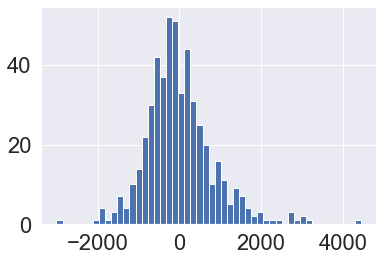

In [234]:
residuals.hist(bins=50)

Residuals are normally distributed around 0, confirming capture of linear signals

### Train set performance

Text(0, 0.5, 'cnt')

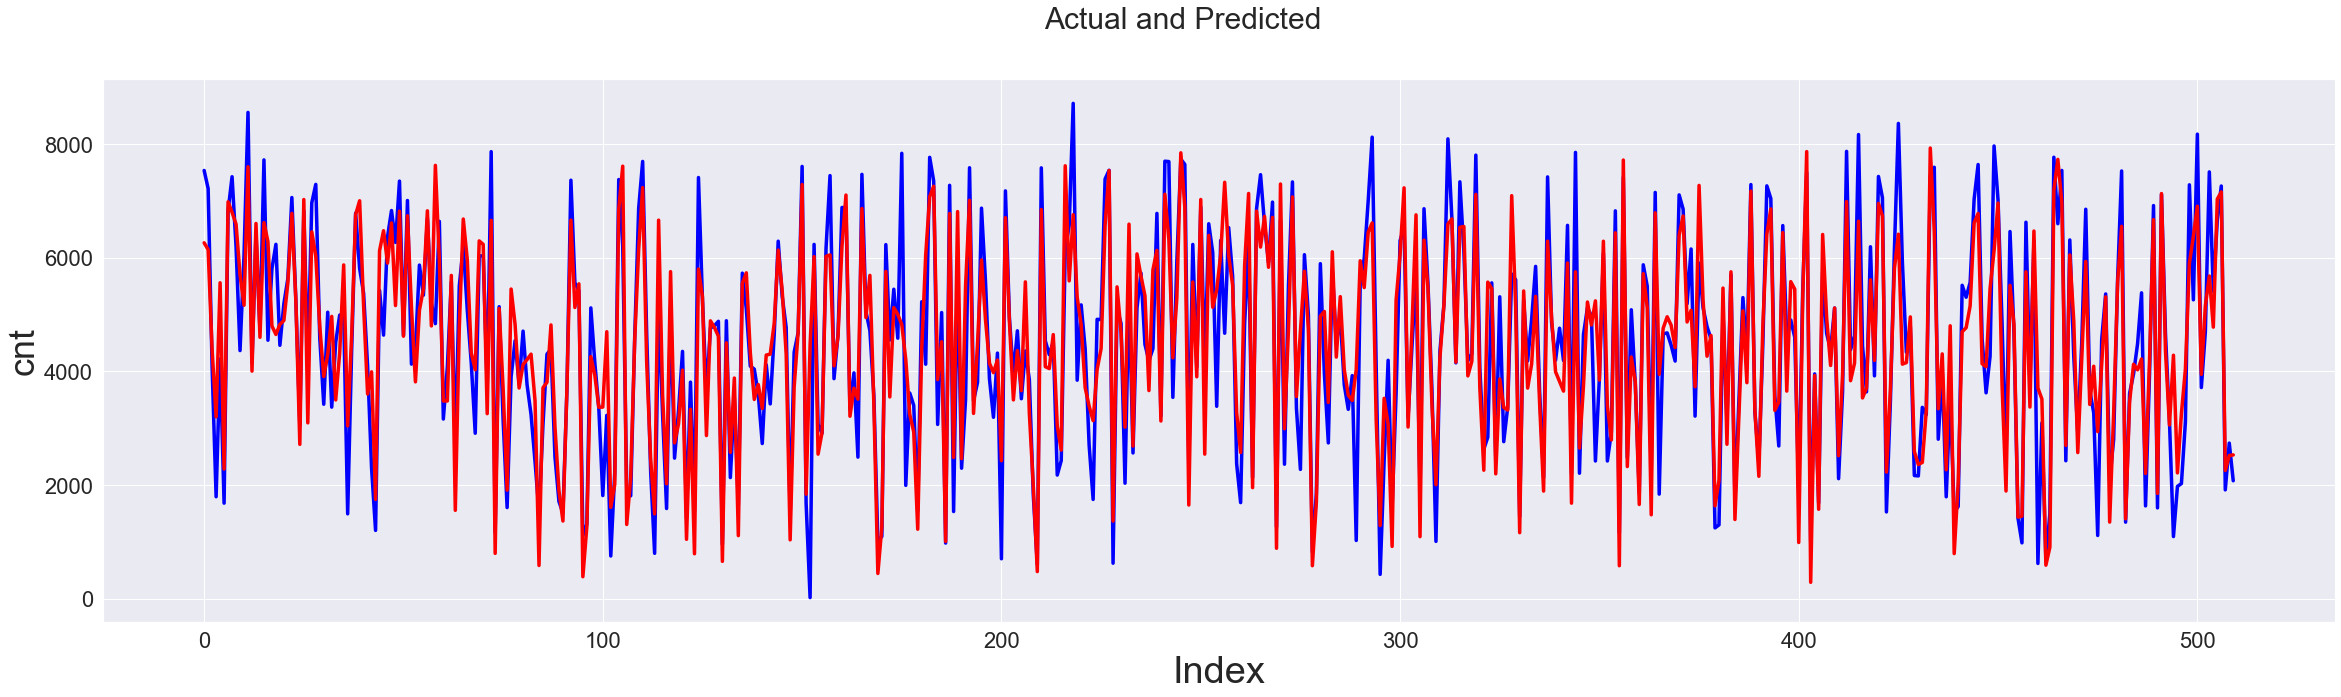

In [235]:
#Actual vs Predicted
c = [i for i in range(X_train.shape[0])]
fig = plt.figure(figsize=(40,10))
plt.plot(c,y_train, color="blue", linewidth=3.5, linestyle="-")
plt.plot(c,predicted_values, color="red",  linewidth=3.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=30)              # Plot heading 
plt.xlabel('Index', fontsize=38)                               # X-label
plt.ylabel('cnt', fontsize=36)  

In [236]:
# calculate RMSE
from sklearn.metrics import mean_squared_error, r2_score

mse_train = mean_squared_error(predicted_values, y_train)

from math import sqrt
rmse_train = sqrt(mse_train)
print(rmse_train)

836.6659849375249


### Evaluation on test set

In [237]:
target = 'cnt'
predictors = [x for x in df_train.columns if x!=target]

In [238]:
X_test = df_test[predictors]
y_test = df_test[target]

In [239]:
X_test = scaler.transform(X_test)

In [240]:
X_test = pd.DataFrame(X_test)
X_test.columns = predictors
X_test.index = df_test.index

# add constant
X_test['const'] = 1

In [241]:
X_test = X_test[X_train.columns]

In [242]:
y_pred = lm_final.predict(X_test)

In [243]:
residuals_test = y_pred - y_test

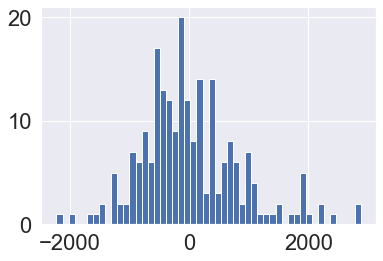

In [244]:
residuals_test.hist(bins=50)

Text(0, 0.5, 'cnt')

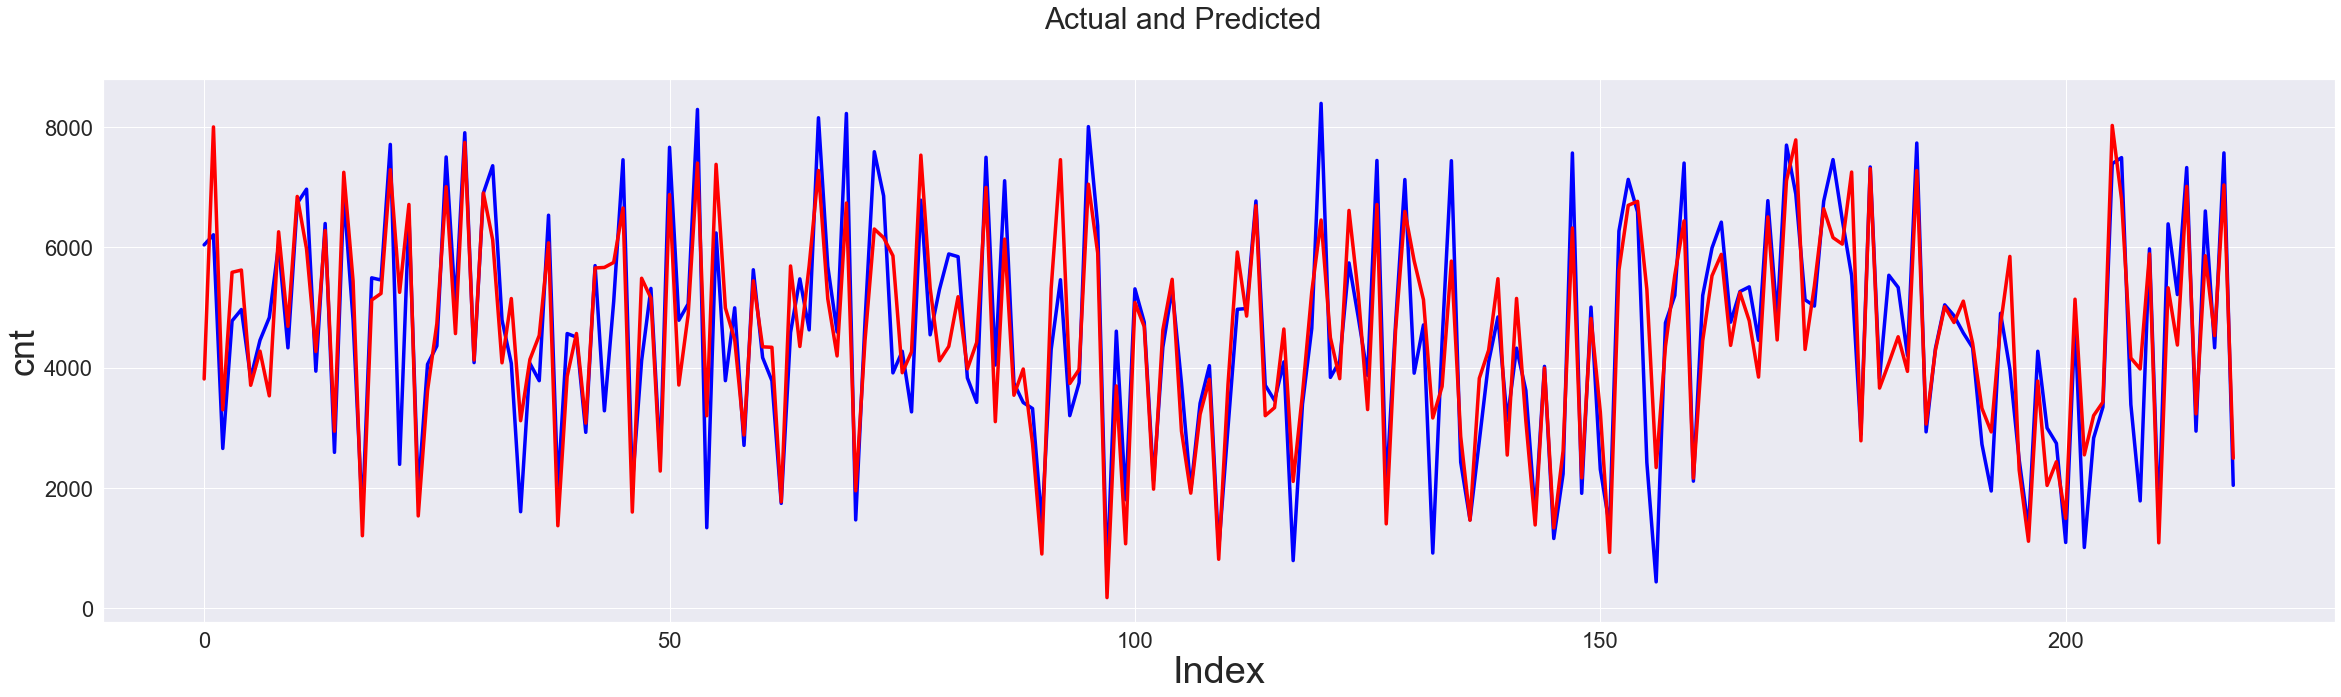

In [245]:
#Actual vs Predicted
c = [i for i in range(X_test.shape[0])]
fig = plt.figure(figsize=(40,10))
plt.plot(c,y_test, color="blue", linewidth=3.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=3.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=30)              # Plot heading 
plt.xlabel('Index', fontsize=38)                               # X-label
plt.ylabel('cnt', fontsize=36)  

In [246]:
# calculate RMSE
from sklearn.metrics import mean_squared_error, r2_score

mse_test = mean_squared_error(y_pred, y_test)

from math import sqrt
rmse_test = sqrt(mse_test)
print(rmse_test)

840.3621125819135


#### R-Squared Value

In [247]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8031940558375186

## Parameters of linear regression model


In [248]:
lm_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sun, 13 Dec 2020   Prob (F-statistic):          2.97e-176
Time:                        20:11:39   Log-Likelihood:                -4155.7
No. Observations:                 510   AIC:                             8333.
Df Residuals:                     499   BIC:                             8380.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
temp             4833.1760    205.210     23.552      0.000    4429.995    5236.357
hum             -2652.8550    323.362     -8.204      0.000   -3288.175   -2017.535
windspeed       -1983.6925    235.330     -8.429      0.000   -2446.052   -1521.333
season_summer     918.1494    101.966      9.004      0.000     717.813    1118.485
season_winter    1267.8736     99.420     12.753      0.000    1072.540    1463.207
yr_1             1996.6952     75.922     26.299      0.000    1847.528    2145.862
mnth_Aug          503.0175    152.537      3.298      0.001     203.324     802.711
mnth_Sep         1042.0929    151.555      6.876      0.000     744.328    1339.857
holiday_1        -739.1612    239.245     -3.090      0.002   -1209.214    -269.109
weathersit_Mist  -211.9102     93.275     -2.272      0.024    -395.170     -28.651
const            2656.0190    240.409     11.048      0.000    2183.681    3128.357
==============================================================================
Omnibus:                       95.028   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.772
Skew:                          -0.924   Prob(JB):                     9.55e-55
Kurtosis:                       5.880   Cond. No.                         16.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""